## For PascalVOC

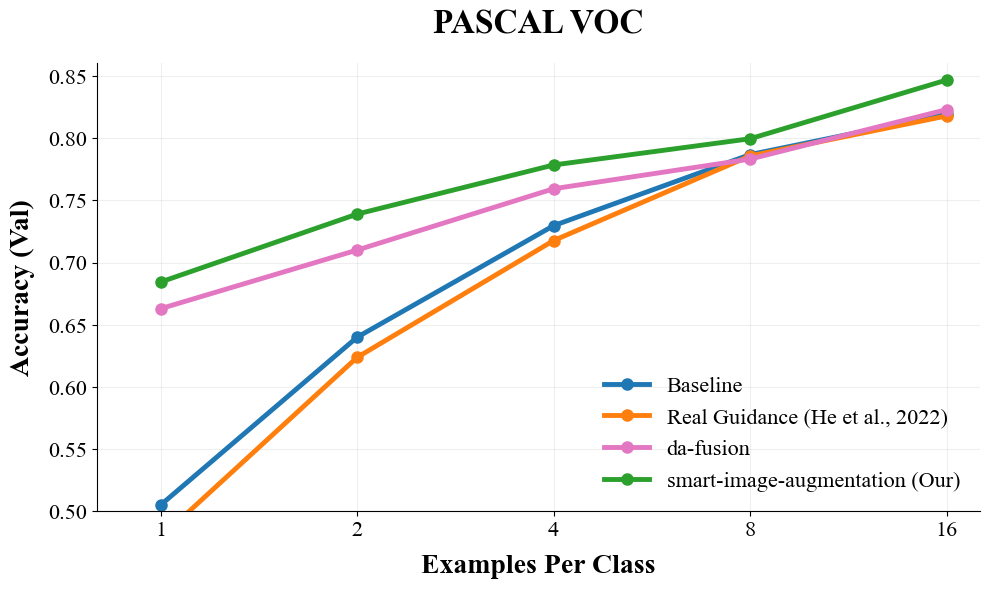

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np
# Constants
BASE_FOLDER = '/Users/andrew/Thesis/smart-image-augmentation/results/pascal-my-researchers'
METHODS = {
    'baseline': 'Baseline',
    'real-guidance-0.5-cap': 'Real Guidance (He et al., 2022)',
    'textual-inversion-1.0-0.75-0.5-0.25': 'da-fusion',
    'smart-image-aumentation': 'smart-image-augmentation (Our)',
}

def load_and_process_data(folder):
    all_files = glob.glob(os.path.join(folder, "*.csv"))
    if not all_files:
        print(f"No CSV files found in {folder}")
        return None
    df_list = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename, index_col=0)
            df_list.append(df)
        except Exception as e:
            print(f"Error reading {filename}: {e}")
    if not df_list:
        print(f"No valid CSV files found in {folder}")
        return None
    combined_df = pd.concat(df_list, ignore_index=True)
    filtered_df = combined_df[(combined_df['metric'] == 'Accuracy') & 
                              (combined_df['split'] == 'Validation')]
    best_results = filtered_df.groupby('examples_per_class')['value'].max().reset_index()
    return best_results


def plot_results(base_folder, output_filename):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    color_palette = ['#1f77b4', '#ff7f0e', '#e377c2', '#2ca02c']
    for i, (folder, method_name) in enumerate(METHODS.items()):
        full_path = os.path.join(base_folder, folder)
        if not os.path.exists(full_path):
            print(f"Folder not found: {full_path}")
            continue
        data = load_and_process_data(full_path)
        if data is None:
            continue
        plt.plot(data['examples_per_class'], data['value'], marker='o', linewidth=3.5, 
         color=color_palette[i], label=method_name, markersize=8)
    plt.title('PASCAL VOC', fontsize=24, fontweight='bold', y=1.05)
    plt.xlabel('Examples Per Class', fontsize=20, fontweight='bold', labelpad=10)
    plt.ylabel('Accuracy (Val)', fontsize=20, fontweight='bold', labelpad=10)
    plt.xscale('log', base=2)
    plt.xticks([1, 2, 4, 8, 16], ['1', '2', '4', '8', '16'], fontsize=16)
    plt.yticks(np.arange(0.50, 0.86, 0.05), fontsize=16)
    plt.ylim(0.55, 0.86)
    plt.xlim(0.8, 18)
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend(fontsize=16, loc='lower right', frameon=False)
    plt.tight_layout()
    plt.savefig(f'{output_filename}_final.png', dpi=300, bbox_inches='tight')
    plt.show()

# Usage
plot_results(BASE_FOLDER, 'pascal_results_plot')